# Customer churn prediction

## <u>Project Overview</u>

A Dataset from the Telco Domain. Due to tough competition the customers tend to switch between the Telecommunicatin service providers. 
E.g. an Airtel customer might transition to Jio services and vice versa. This behaviour from the customers is known as churn.


## <u>Objective </u>
To be able to predict if a customer would churn or not. Take the Next Best Action to Prevent churn.


## <u>Stages to be covered during the solution</u>
- `Data Merging and Wrangling:` Combining multiple data sources and cleaning the data
- `Exploratory Data ANalysis:` Understanding the relationship between features and with target
- `Data pre-processing:` Data Encoding, Missing Value Treatment, Outilier Treatment, Feature Scaling
- `Model Bulding:` Train ML Model using the pre-processed data
- `Evalution:` Asses the Model's performance



> By the end of this project, you will have a complete workflow for predicting churn and/or creating classsifiction models
 --- 

#  Domain Background (Telecom Churn Story) 

Imagine you are a data analyst at a telecommunication comapany (let's call it TeleComCo). TelComCo provides phone  and internet services to customers. Like all telecom
Companies, TeleComCo is concerned about customer churn- when customers stop using the service. High churn rated means lost revenue and can indicate dissatisfaction with
the sevice.

Story: Last quater, TeleComCo noticed an increase in customers leaving for competitors. The management has asked your team to investigate why customers are churning and
to build a model that can predict which customers are at risk of leaving. With such a model, the company can proactively reach out to at-risk customers with retention offers.
You have been provided with a dataset of past and current customers containing various details about their accounts and whether or not they churned. Your task is to analyze this data, find patterns related to churn, and create a predictive model using logistic regression.

By analyzing the data, you might uncover stories such as :- Long-term loyal customers(with many months of tenur might churn less) often, whereas new custmers are more at risk - customer with certain plans or higher monthly charges might be more inclined to leave, 
perhaps due to cost- Demographics might play a role-for example, senior citizens could have different usage patterns or needs. - Payment and service preferences (like using paperless billing or having phone service bundled) might correlate with churn behavior.

Through careful inestigation and modeling, TeleComCo hopes to reduce churn by understanding these patterns and intervening in time.

---


# <u>Dataset Description</u>

The dataset consists of customer records, each with a variety of features describing the customer and their service usage. below is an overview of each column in the data:
- `customer_id :` A unique identifier for each customer (e.g. a UUID). This is just an ID and not useful for prediction.
- `customer_email :` THe email address of the customer. This is an identifier as well as not directly useful for the model.
- `age :` The age of the customer(in years). This could be related to churn if different age groups ahve different service preferences.
- `senior_citizen :` Whether the customer is a senior citizen or not (boolean: true/False). Typically, this might be derived from age (e.g, age > 65).
- `partner :` Whether the customer has a partner or not(boolean). This indicates if the customer is married or in a long-term partnership. In telecom, having a partner might mean family plans or shared services.
- `dependents :` Whether the customer has dependents (children or other dependents) or not (boolean). Customers with dependents might have different usge(e.g, family plans.)
- `tenure_months :` The number of months the customer has been with the company. Higher tenure might indicate loyality; low tenure customers are newer and might be more likely to curn if they haven't establidhed loyality.
- `phone_sercive :` Whether the customer has phone service with the company(boolean). Some customers might only have internet service; this feature tells if they also subscribed to phone
- `paperless_billing :` Whether the customer has opted for paperless billing (boolean). This could be a proxy for tech-savvy behaviour or convenience preference.
- `monthly_charges :` The total amount `$` charged to the customer every month. This is like their monthly bill.
Customers with higher bills might churn due to cost, or those with very low bills might churn if they are not using many services.
- `total_charges :` The total amount `$` the customer has been charged since joining (this is roughly monthly_charges * tenure, plus any extras). This can indicate the overall value of the customer, low total charges might mean the customer is relatively new or has a low_cost plan.
- `churn :` The target variable - whether the customer has churned (true = yes, the customer left; false = no, the customer is still with  the company). This is what we want to predict.
- `last_interaction_date : ` The date of the last interaction with the customer (could be the last service use or last customer support call, etc.). This might give insight into how recently the customer was active. Customers with very old last interactions might have silently chrned.
- `region :` The geographic region or state where the customer resides(e.g., Ohio , California, etc). Different regions might have different market conditions or competitor presence , possible affecting churn.
- `signup_date :` Thedate when the customer originally signed up for service. (Note: This column is present in one of the source files. When we merged data, some records might not have a signup_date if it wasn't recorded for them)

---

## Potential Questions and Considerations:
<u>Based  on the above features, here are some questions that might arise and that will explore in this project</u>

- Do older customers or senior citizens tend to churn more or less tahan younger customer?
- Does having a partnerr or dependents influence churn? (For example, do single customers churn more often than those with family plans?)
- How does tenure relate to churn? Are newer customer more likely to leaves comapred to long-term customers?
- What about monthly charges? Are customers with high monthly charges more likely to churn (perhapes due to higher cost),or could it be that those with low charges churn because they might not be fully utilizing the service?
- Are there any regional trends in churn? (We might check if certain regions have higher churn rates.)
- How do features like phone service or paperless billing correlate with churn? (e.g,maybe paperless billing user are more engaged or maybe less personal interactioon leads to higher churn?)
- Are ther outliers or unusual values in charges or tenure that need special attention?

Try to answer these questions step-by-step in the analysis below.

### Task 0: Import required liberaries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# To tell python to show the pyplot in the output section of the cell
%matplotlib inline   

### Task 1: Combine the two datasets
The customer data is provided in two CSV files (say , customer _churn_data.csv and customer_churn_data_2.csv). 
Load both the files and combin them into a single pandas DataFrame for analysis.
The two files have the same columns (one file may have an extra column signup_date.)
Ensure that after merging, all columns are aligned correctly.

In [8]:
file1 = pd.read_csv('Customer_Churn_data.csv')
print(file1.shape)
file1.head(2)

(100000, 14)


,customer_id,customer_email,age,senior_citizen,partner,dependents,tenure_months,phone_service,paperless_billing,monthly_charges,total_charges,churn,last_interaction_date,region
0,0f1eb305-e440-4576-9ab0-f8bdbf0bd17b,Preston.Cartwright54@hotmail.com,74,True,False,True,50,True,True,104.265791,1647.518754,False,2024-08-16T21:32:39.602Z,Ohio
1,0e0237a0-dc14-4610-9c74-5f50d72dd00a,Agustin_Treutel@yahoo.com,43,False,False,True,28,True,True,116.143274,4882.935552,False,2025-01-11T09:46:16.708Z,Oklahoma


In [9]:
file2 = pd.read_csv('Customer_Churn_data_2.csv')
print(file2.shape)
file2.head(2)

(100000, 15)


,customer_id,customer_email,age,senior_citizen,partner,dependents,tenure_months,phone_service,paperless_billing,monthly_charges,total_charges,churn,last_interaction_date,region,signup_date
0,132dcfb5-759a-4640-9156-79319d71b7f1,Jarod_Heidenreich@yahoo.com,62,False,True,True,28,True,False,129.603120,2285.999558,False,2024-09-19T04:01:17.383Z,Virginia,2023-04-23T21:52:19.052Z
1,c560d179-94a5-487a-9fd6-b1174fea339f,Julianne67@gmail.com,64,False,True,True,6,False,False,27.488638,5045.149417,False,2024-12-08T06:33:58.864Z,Pennsylvania,2022-01-03T16:36:13.193Z


### Task 2: View the first few rows of the combined data

After merging , use the  DataFrame's .head() method to display the first 5 rows of the combined dataset. This will help to verify that the data from both files has been concatenated correctly and that columns are as expected.  

In [11]:
data = pd.concat([file1,file2],ignore_index=True)
data.head()

,customer_id,customer_email,age,senior_citizen,partner,dependents,tenure_months,phone_service,paperless_billing,monthly_charges,total_charges,churn,last_interaction_date,region,signup_date
0,0f1eb305-e440-4576-9ab0-f8bdbf0bd17b,Preston.Cartwright54@hotmail.com,74,True,False,True,50,True,True,104.265791,1647.518754,False,2024-08-16T21:32:39.602Z,Ohio,NaN
1,0e0237a0-dc14-4610-9c74-5f50d72dd00a,Agustin_Treutel@yahoo.com,43,False,False,True,28,True,True,116.143274,4882.935552,False,2025-01-11T09:46:16.708Z,Oklahoma,NaN
2,b5b9e32b-7332-42d5-a003-14150c2f0097,Maud47@yahoo.com,53,False,False,True,21,False,False,106.498230,6143.648727,True,2024-09-06T23:20:50.027Z,Massachusetts,NaN
3,2a3577e1-6851-4d44-be14-c952fdf9b59b,Curt.Collins84@gmail.com,47,True,True,True,72,True,False,86.835176,5933.628877,True,2025-03-09T07:33:07.830Z,New Mexico,NaN
4,105d0f7f-3885-4811-b465-2c46d4cb9b8b,Waino_Dibbert@gmail.com,41,False,True,True,41,False,False,109.869838,649.543888,True,2025-05-20T08:53:44.748Z,Ohio,NaN


### Task 3: Understand the dataset dimensions and dtypes

Determine the size of the combined dataset. Find out how many rows and columns are present. This can be done using the DataFrame's .info() method.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   customer_id            200000 non-null  object 
 1   customer_email         200000 non-null  object 
 2   age                    200000 non-null  int64  
 3   senior_citizen         200000 non-null  bool   
 4   partner                200000 non-null  bool   
 5   dependents             200000 non-null  bool   
 6   tenure_months          200000 non-null  int64  
 7   phone_service          200000 non-null  bool   
 8   paperless_billing      200000 non-null  bool   
 9   monthly_charges        200000 non-null  float64
 10  total_charges          200000 non-null  float64
 11  churn                  200000 non-null  bool   
 12  last_interaction_date  200000 non-null  object 
 13  region                 200000 non-null  object 
 14  signup_date            100000 non-nu

### verfiy if the data has been loaded correctly?

In [15]:
## last_interaction_date -> convert to datetime
pd.to_datetime(data['last_interaction_date'])

0        2024-08-16 21:32:39.602000+00:00
1        2025-01-11 09:46:16.708000+00:00
2        2024-09-06 23:20:50.027000+00:00
3        2025-03-09 07:33:07.830000+00:00
4        2025-05-20 08:53:44.748000+00:00
                       ...               
199995   2025-05-21 09:52:17.556000+00:00
199996   2025-07-10 15:34:20.668000+00:00
199997   2024-08-29 14:23:43.051000+00:00
199998   2024-12-16 22:52:46.528000+00:00
199999   2024-12-18 00:40:51.424000+00:00
Name: last_interaction_date, Length: 200000, dtype: datetime64[ns, UTC]

In [16]:
data['last_interaction_date'] = pd.to_datetime(data['last_interaction_date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype              
---  ------                 --------------   -----              
 0   customer_id            200000 non-null  object             
 1   customer_email         200000 non-null  object             
 2   age                    200000 non-null  int64              
 3   senior_citizen         200000 non-null  bool               
 4   partner                200000 non-null  bool               
 5   dependents             200000 non-null  bool               
 6   tenure_months          200000 non-null  int64              
 7   phone_service          200000 non-null  bool               
 8   paperless_billing      200000 non-null  bool               
 9   monthly_charges        200000 non-null  float64            
 10  total_charges          200000 non-null  float64            
 11  churn                  200000 non-null 

In [17]:
pd.to_datetime(data['signup_date'])

0                                     NaT
1                                     NaT
2                                     NaT
3                                     NaT
4                                     NaT
                       ...               
199995   2021-12-22 17:50:57.953000+00:00
199996   2023-12-22 16:19:06.992000+00:00
199997   2020-09-19 16:17:05.024000+00:00
199998   2024-05-03 17:10:54.346000+00:00
199999   2021-03-07 20:04:13.484000+00:00
Name: signup_date, Length: 200000, dtype: datetime64[ns, UTC]

In [18]:
data['signup_date'] = pd.to_datetime(data['signup_date'])     # infer_datetime_format = True -> to handle mixed formates in a single column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype              
---  ------                 --------------   -----              
 0   customer_id            200000 non-null  object             
 1   customer_email         200000 non-null  object             
 2   age                    200000 non-null  int64              
 3   senior_citizen         200000 non-null  bool               
 4   partner                200000 non-null  bool               
 5   dependents             200000 non-null  bool               
 6   tenure_months          200000 non-null  int64              
 7   phone_service          200000 non-null  bool               
 8   paperless_billing      200000 non-null  bool               
 9   monthly_charges        200000 non-null  float64            
 10  total_charges          200000 non-null  float64            
 11  churn                  200000 non-null 

### Task 4: Generate summary statistics

Use the .describe() method on the DataFrame to get summary statistic for the numeric columns (count, mean, std, min, quartiles, max.) 
This will give an overview of the distribution (e.g, average tenure, min/max , charge etc).                                                                   

In [20]:
data.describe(include=object)

,customer_id,customer_email,region
count,200000,200000,200000
unique,200000,197332,50
top,0f1eb305-e440-4576-9ab0-f8bdbf0bd17b,Emerson28@gmail.com,North Dakota
freq,1,4,4180


In [21]:
data.describe(include=int)

,age,tenure_months
count,200000.000000,200000.000000
mean,54.031670,35.976150
std,21.048897,21.053301
min,18.000000,0.000000
25%,36.000000,18.000000
50%,54.000000,36.000000
75%,72.000000,54.000000
max,90.000000,72.000000


In [22]:
data.describe(include=float)

,monthly_charges,total_charges
count,200000.000000,200000.000000
mean,76.618568,4006.213781
std,34.891140,2303.960157
min,18.000333,18.027625
25%,46.902328,2015.261182
50%,75.754153,3999.740393
75%,104.441355,6001.846181
max,149.998856,7999.994083


In [23]:
data.describe(include=bool)

,senior_citizen,partner,dependents,phone_service,paperless_billing,churn
count,200000,200000,200000,200000,200000,200000
unique,2,2,2,2,2,2
top,True,False,False,False,True,True
freq,100054,100001,100202,100043,100117,100013


In [24]:
data.describe(include=['datetimetz'])

,last_interaction_date,signup_date
count,200000,100000
mean,2025-02-02 21:13:13.894031872+00:00,2023-02-03 04:16:50.602242048+00:00
min,2024-08-04 12:54:19.943000+00:00,2020-08-05 13:04:51.741000+00:00
25%,2024-11-03 17:43:17.303000064+00:00,2021-11-04 20:06:11.245750016+00:00
50%,2025-02-02 22:44:00.503000064+00:00,2023-02-01 14:36:04.458499840+00:00
75%,2025-05-05 08:50:22.581000192+00:00,2024-05-02 17:46:17.339500032+00:00
max,2025-08-04 12:49:38.839000+00:00,2025-08-04 11:36:35.778000+00:00


### Task5: Check for duplicate entries

Ensure there are no dulplicate customer records in the data. For instance, verify if customer_id is unique across the combined dataset.
You can use pandas functions like .duplicated() on the customer_id column to check for any duplicates

In [26]:
data['customer_id'].duplicated()   # row wise view

0         False
1         False
2         False
3         False
4         False
          ...  
199995    False
199996    False
199997    False
199998    False
199999    False
Name: customer_id, Length: 200000, dtype: bool

In [27]:
data['customer_id'].duplicated().sum()   # number of duplicated rows in the given column

0

In [28]:
data.duplicated().sum()   # number of duplicated rows in the given dataframe

0

In [29]:
data['customer_email'].duplicated().sum()   # number of duplicated in the given column

2668

### Task 6: Identify missing values

Identify if there are any missing values in the dataset and in which columns.
Use methods like isnull().sum() to get the count of null or NaN values per column. 
This will highlight columns that need attention (e.g we expect many missing in signup_date if one file lacked it). 

In [31]:
data.isnull().head()

,customer_id,customer_email,age,senior_citizen,partner,dependents,tenure_months,phone_service,paperless_billing,monthly_charges,total_charges,churn,last_interaction_date,region,signup_date
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


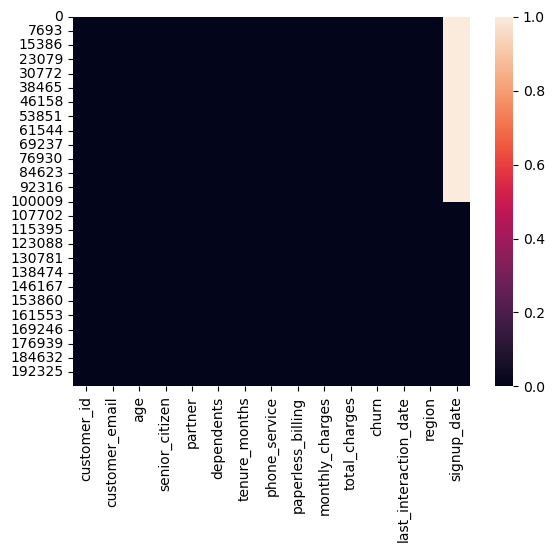

In [32]:
sns.heatmap(data.isnull())
plt.show()

In [33]:
data.isnull().sum()

customer_id                   0
customer_email                0
age                           0
senior_citizen                0
partner                       0
dependents                    0
tenure_months                 0
phone_service                 0
paperless_billing             0
monthly_charges               0
total_charges                 0
churn                         0
last_interaction_date         0
region                        0
signup_date              100000
dtype: int64

### Task 7: Analysis the pattern of missing data

Examine the missing data pattern and determine the likely mechanism: Are the missing values MCAR (Missing Completly at Random)-i.e. no identifiable pattern, just
random? or MAR (Missing At Random)-i.e, the missingness is related to some other obsrved data? - Or MNAR (Missing Not at Random)-i.e, the missingness has a pattern related to the unobserved value itself or is systematically absent for a particular subset?

Question: Based on the columns with missing data. WHat type of missingness do you suspect? For example, if signup_date is missing for all customers from one file, that's a systemic pattern (likely MNAR or a data collection issue).Document your reasoning

### 8: Handling Missing Values

Decide on a strategy to handle the missing data identified above. For instance:- If a column has too many missing values (or is not crucial), you might choose to drop that column.
if  only a few records have missing values, you might choose to fill (impute) them with an appropriate value (mean,median,mode, or a special indicator).

Apply the chosen strategy: For example, if signup_date is missing for a large portion and not critical to the analysis, you might drop the signup_date column to simplify the dataset

### Task 9: Drop unneeded columns

There are some columns that are not useful for predicting churn and could be removed to simplify the analysis. Typically , identifier columns like customer_id and 
customer_email do not have predictive value. Also , if we have decided not to use certain columns(like dates or any others) for modeling , we can drop them as well to avoid clutte.

Removing the following: - customer _id and customer_email (identifiers) - last_interaction_date(a date field taht we will not use in the model for now, to keep things simple)- signup_date(if you did not drop it already in the missing data step)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype              
---  ------                 --------------   -----              
 0   customer_id            200000 non-null  object             
 1   customer_email         200000 non-null  object             
 2   age                    200000 non-null  int64              
 3   senior_citizen         200000 non-null  bool               
 4   partner                200000 non-null  bool               
 5   dependents             200000 non-null  bool               
 6   tenure_months          200000 non-null  int64              
 7   phone_service          200000 non-null  bool               
 8   paperless_billing      200000 non-null  bool               
 9   monthly_charges        200000 non-null  float64            
 10  total_charges          200000 non-null  float64            
 11  churn                  200000 non-null 

In [38]:
data.set_index('customer_id',inplace = True)  # we can choose to make cols with all unique vlues as row index for better reference
data.head()

,customer_email,age,senior_citizen,partner,dependents,tenure_months,phone_service,paperless_billing,monthly_charges,total_charges,churn,last_interaction_date,region,signup_date
customer_id,,,,,,,,,,,,,,
0f1eb305-e440-4576-9ab0-f8bdbf0bd17b,Preston.Cartwright54@hotmail.com,74,True,False,True,50,True,True,104.265791,1647.518754,False,2024-08-16 21:32:39.602000+00:00,Ohio,NaT
0e0237a0-dc14-4610-9c74-5f50d72dd00a,Agustin_Treutel@yahoo.com,43,False,False,True,28,True,True,116.143274,4882.935552,False,2025-01-11 09:46:16.708000+00:00,Oklahoma,NaT
b5b9e32b-7332-42d5-a003-14150c2f0097,Maud47@yahoo.com,53,False,False,True,21,False,False,106.498230,6143.648727,True,2024-09-06 23:20:50.027000+00:00,Massachusetts,NaT
2a3577e1-6851-4d44-be14-c952fdf9b59b,Curt.Collins84@gmail.com,47,True,True,True,72,True,False,86.835176,5933.628877,True,2025-03-09 07:33:07.830000+00:00,New Mexico,NaT
105d0f7f-3885-4811-b465-2c46d4cb9b8b,Waino_Dibbert@gmail.com,41,False,True,True,41,False,False,109.869838,649.543888,True,2025-05-20 08:53:44.748000+00:00,Ohio,NaT


In [39]:
# Since email is a PII (personal Information Identifier) it should never be used as a machine learning feature
# Since there is no logic to replace/fill the missing values for signup_date, we would drop the column

data.drop(['customer_email','signup_date'],axis=1,inplace=True)
data.head()

,age,senior_citizen,partner,dependents,tenure_months,phone_service,paperless_billing,monthly_charges,total_charges,churn,last_interaction_date,region
customer_id,,,,,,,,,,,,
0f1eb305-e440-4576-9ab0-f8bdbf0bd17b,74,True,False,True,50,True,True,104.265791,1647.518754,False,2024-08-16 21:32:39.602000+00:00,Ohio
0e0237a0-dc14-4610-9c74-5f50d72dd00a,43,False,False,True,28,True,True,116.143274,4882.935552,False,2025-01-11 09:46:16.708000+00:00,Oklahoma
b5b9e32b-7332-42d5-a003-14150c2f0097,53,False,False,True,21,False,False,106.498230,6143.648727,True,2024-09-06 23:20:50.027000+00:00,Massachusetts
2a3577e1-6851-4d44-be14-c952fdf9b59b,47,True,True,True,72,True,False,86.835176,5933.628877,True,2025-03-09 07:33:07.830000+00:00,New Mexico
105d0f7f-3885-4811-b465-2c46d4cb9b8b,41,False,True,True,41,False,False,109.869838,649.543888,True,2025-05-20 08:53:44.748000+00:00,Ohio


## Exploratory Data Analysis (EDA)

Now that the data is clean and prepared, let's perform some exploratory analysis to understand the data better and to gether insights about what fctors might affect churn.
WE will look at the distribution of variables and relationships between features and the churn outcome.

### Task 10: Examine the dustribution of the target variable (churn)

Let's see how many customers in our dataset churned vs. stayed.
Plot a count of churned vs non-churned customers. 
This can be done using a bar plot (or simply checking the value counts).
This will tell us the balance of our classes(churn vs no churn).

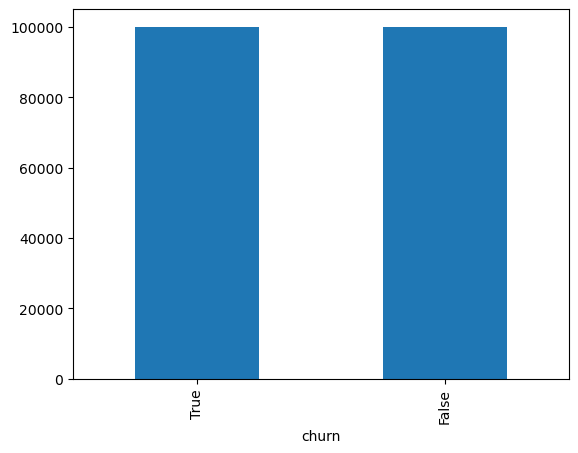

In [42]:
data.churn.value_counts().plot(kind='bar')      # Analysis : we have a balance data set with almost 50:50 rows for both classes
plt.show()

### Task 11: Distribution of customer ages

Plot a histogram of the age of customers. This will show the distribution of customer ages. Are most customer in a certain age range? This might help identify if our customer base in younger or older on average.

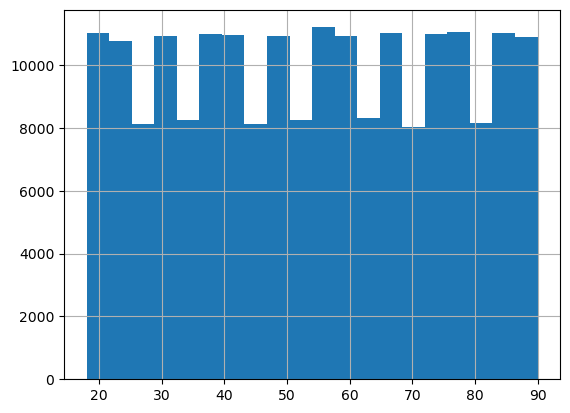

In [44]:
data.age.hist(bins=20)       # The age distribution seems to be unoformly distributed
plt.show()

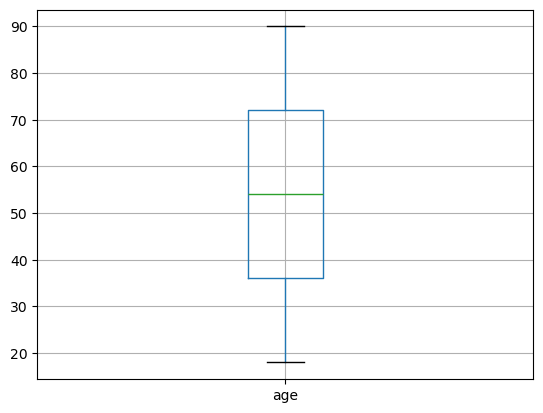

In [45]:
data.boxplot('age')
plt.show()

In [46]:
data.age.describe()

count    200000.000000
mean         54.031670
std          21.048897
min          18.000000
25%          36.000000
50%          54.000000
75%          72.000000
max          90.000000
Name: age, dtype: float64

### Task 12: Distribution of customer tenure

Plot a histogram of the tenure_months to see how log customers tends to stay with the company. Is there a large number of new customers(low tenure) in the data? Do we see many customers at the maxuimum tenure (72 months, if that's the max)? Undrstanding tenure distribution will help in analyzing churn by tenure later.

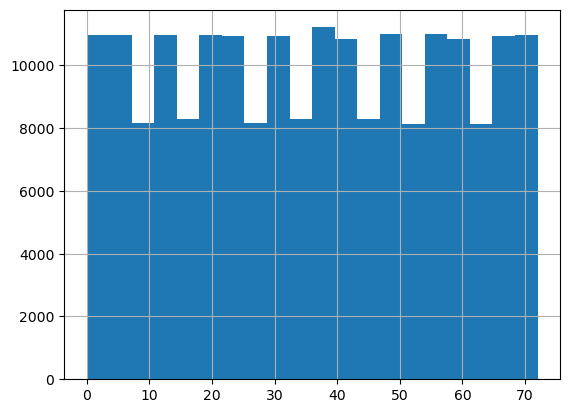

In [48]:
data.tenure_months.hist(bins=20)
plt.show()

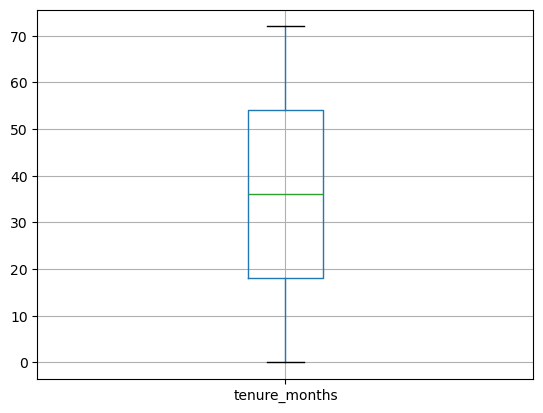

In [49]:
data.boxplot('tenure_months')
plt.show()

In [50]:
data.tenure_months.describe()

count    200000.000000
mean         35.976150
std          21.053301
min           0.000000
25%          18.000000
50%          36.000000
75%          54.000000
max          72.000000
Name: tenure_months, dtype: float64

In [51]:
data.tenure_months.value_counts()

tenure_months
36    2848
15    2847
46    2827
47    2825
39    2824
      ... 
59    2663
27    2662
6     2653
49    2636
8     2627
Name: count, Length: 73, dtype: int64

In [52]:
# Analysis : We can customer who have spent time over the full range. Uniform dustribution
# In case of uneven dist we can transform te varible into categories like new, <3M, <6M, <1Y, <2Y, >2Y

### Task 13: Distribution of monthly charges

Plot a histogram of the monthly_charges. This shows the distribution of monthly billing amounts. We can see the range of charges and if it's skewed (e.g, many customers at lower tiers vs higher tiers). Sometimes, very high or very low charges could influence churn

In [54]:
data.monthly_charges.value_counts()    # for floating variables value count is not of much use for analysis

monthly_charges
104.265791    1
58.714132     1
72.455781     1
103.717736    1
115.464890    1
             ..
83.073299     1
83.011370     1
86.599362     1
45.582668     1
63.586737     1
Name: count, Length: 200000, dtype: int64

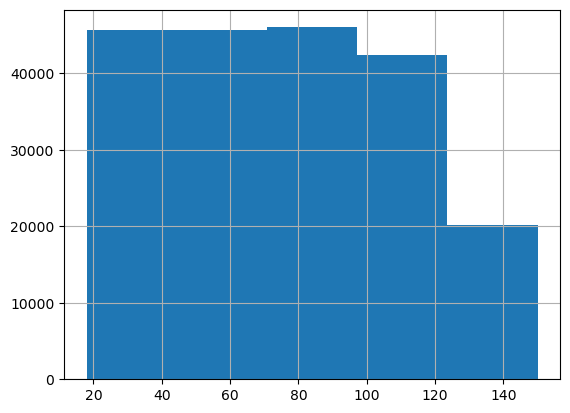

In [55]:
data.monthly_charges.hist(bins=5)   # Analysis: Comparitively the high pying customers are less in number
plt.show()

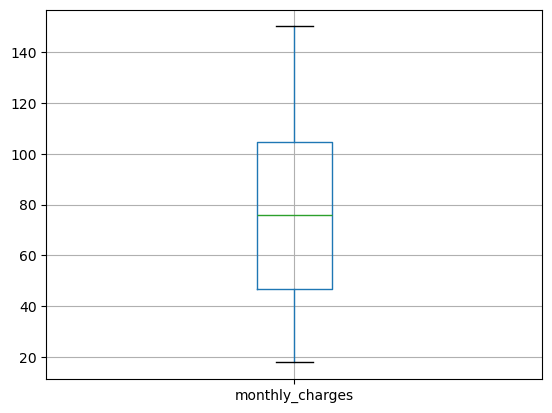

In [56]:
data.boxplot('monthly_charges')
plt.show()

### Task 14: Churn rate by senior citizen status

Question : Are senior citizens more likely to churn compared to non-senior customers? Calculate the churn rate for senior citizens vs non-senior citizens.
Churn rate can be defined as the percentage of customers in that group who have churned.

You can do this by grouping the data by senior_citzen and calculating the mean of the churn column(if churn is encoded a 0/1, the mean gives the proportion that churned).
Alternatively , use value_counts of churn within each group.

In [58]:
data.groupby('senior_citizen')['churn'].mean()

senior_citizen
False    0.501411
True     0.498721
Name: churn, dtype: float64

### 15: Churn rate by partner status

Question: Does having a partner influence churn? Compute the churn rate for customers with a partner vs without a partner. Similar to above, group by partner and find the proportion that churned in each group. 

In [60]:
data.groupby('partner')['churn'].mean()

partner
False    0.502445
True     0.497685
Name: churn, dtype: float64

### 16: Average tenure od churned vs non-churned customers

Question: Do customers who churn tend to have shorter tenures? Calculate the average tenure (in months) for churned custmers vs customer who stayed. This can be done by grouping by churn status.

In [62]:
data.groupby('churn')['tenure_months'].mean()

churn
False    35.899937
True     36.052343
Name: tenure_months, dtype: float64

### Task 17: Average monthly charges of churned vs non-churned customers

Question: Do Customers who churn pay more per month? Find the average monthly_charges for churned vs non-churned group

In [64]:
data.groupby('churn')['monthly_charges'].mean()

churn
False    76.601562
True     76.635570
Name: monthly_charges, dtype: float64

### 18: Average total charges of churned vs non- churned customer

Question: How do the total charges differ between churned and retained customers? Calculate the average total_charges for churned vs non-churned customers. (Since total_charges is a function of monthly charges and tenure, will reflect both how long and how much a churned customer contributed versus a stayed customer)

In [66]:
data.groupby('churn')['total_charges'].mean()

churn
False    4005.750196
True     4006.677245
Name: total_charges, dtype: float64

### Task 19: Correlation analysis


Calcualte the correlartion matrix for the numeric features (and the churn indicator, encoded as 0/1).
This will show how strongly features are linearly related to each other and to churn. In particular, look at correlations involving churn. Are any features strongly positively or negatively correlated with churn? Also note if any pair of features are highly correlated with each other (for instance, tenure and total_charge might be strongly correlated since longer tenure usually means more total charges).

In [68]:
data.corr(numeric_only = True)

,age,senior_citizen,partner,dependents,tenure_months,phone_service,paperless_billing,monthly_charges,total_charges,churn
age,1.000000,-0.000988,0.000091,-0.000956,-0.001786,-0.001610,0.002026,0.004099,0.001627,-0.000026
senior_citizen,-0.000988,1.000000,-0.001990,-0.002299,-0.000142,-0.003850,0.003729,-0.001353,-0.002232,-0.002690
partner,0.000091,-0.001990,1.000000,-0.004810,-0.000347,0.001640,0.001040,-0.002987,0.004753,-0.004760
dependents,-0.000956,-0.002299,-0.004810,1.000000,-0.000445,-0.000411,0.002992,-0.000863,0.000091,0.003170
tenure_months,-0.001786,-0.000142,-0.000347,-0.000445,1.000000,0.001462,-0.000562,0.003022,0.000821,0.003620
phone_service,-0.001610,-0.003850,0.001640,-0.000411,0.001462,1.000000,0.003581,-0.002515,-0.000288,-0.001320
paperless_billing,0.002026,0.003729,0.001040,0.002992,-0.000562,0.003581,1.000000,0.000539,0.001884,0.001500
monthly_charges,0.004099,-0.001353,-0.002987,-0.000863,0.003022,-0.002515,0.000539,1.000000,0.003315,0.000487
total_charges,0.001627,-0.002232,0.004753,0.000091,0.000821,-0.000288,0.001884,0.003315,1.000000,0.000201
churn,-0.000026,-0.002690,-0.004760,0.003170,0.003620,-0.001320,0.001500,0.000487,0.000201,1.000000


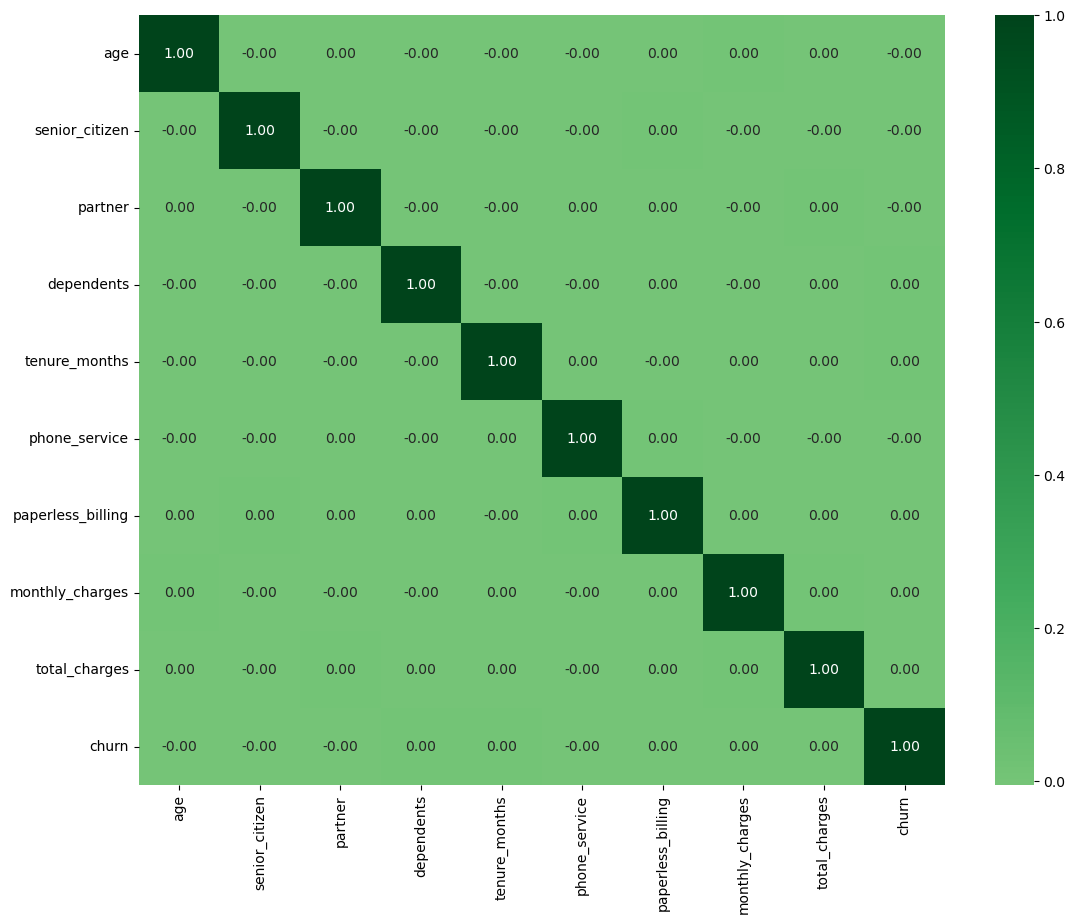

In [69]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(numeric_only=True), annot=True,cmap='Greens',center=0,fmt='.2f')
plt.show()

# Analysis : Since none of the features are highly correlated to any other features, we dont need to drop any features
# If x features a highly correlated, then keep 1 of them and drop x-1. e.g if 7 features are highly correlated the keep ANY 1 and drop the rest 6

### Outlier Detection and treatment

Outlier are extreme values that deviate siginificantly from the rest of the data. They can affect our model, especially logistic regression which could be influenced by very large or small values. We will detect outliers in the key numeric columns and decide on how to handle them. 

We'll use two common methods:
- Interquartile Range (IQR) method: We consider points as outliers if they fall below Q1 - 1.5*QR or above Q3 + 1.5*IQR for a given feature.
  
- z-score method: We calculated the z-score (standard score) for each data point in a feature. A Common rule is to treat points with |z| > 3 as potential outliers(3 standard deviations aways from the mean).

We will apply these methods to the monthly_charges(as an example numeric feature,since charges could have outliers).

### 20: Detect outliers in monthly_charges using the IQR method

Calculate the first quartile(Q1) and third quartile(Q3) of monthly_charges, then compute the IQR (Q3-Q1). Determine the IQR bounds:
- Lower bound = Q1 - 1.5*IQR
- Upper bound = Q3 + 1.5*IQR


Find which data points in monthly_charges lie outside these bounds. How many outlier s do you detect using this rule?

In [72]:
Q1 = data.monthly_charges.quantile(0.25)
Q3 = data.monthly_charges.quantile(0.75)

IQR = Q3-Q1

UL = Q3 + 1.5* IQR
LL = Q1 - 1.5*IQR

ul_outlier_count = data[data['monthly_charges']>UL].shape[0]
ll_outlier_count = data[data['monthly_charges']<LL].shape[0]

print(f"Q1 : {round(Q1,2)} | Q3:{round(Q3,2)} | IQR: {round(IQR,2)} | UL:{round(UL,2)} | ul_outlier_count: {ul_outlier_count} | ll_outlier_count:{ll_outlier_count}")

Q1 : 46.9 | Q3:104.44 | IQR: 57.54 | UL:190.75 | ul_outlier_count: 0 | ll_outlier_count:0


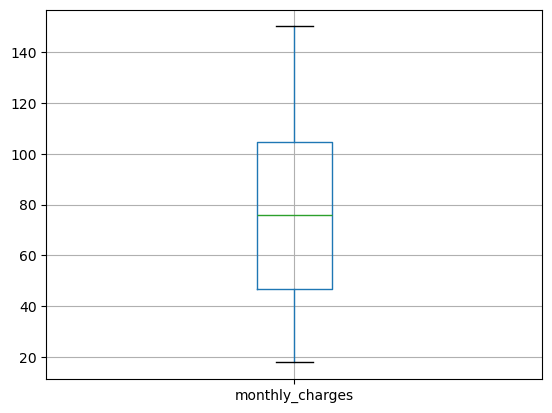

In [73]:
data.boxplot('monthly_charges')
plt.show()

### Task 21: Detect outliers in monthly_charges using the Z-method(This method is used when you have more than 20% as outliers using the IRQ method)

Calcualte the mean and standard Deviation of monthly_charges. Determine the z-methods bounds:
- Lower bound = MEAN - 3* STD_DEV
- Upper bound = MEAN + 3* STD_DEV

Find which data points in monthly_charges lie outside these bounds. How many outliers do you detect using this rule?

In [75]:
import numpy as np

In [76]:
mean = np.mean(data.monthly_charges)
std = np.std(data.monthly_charges)

UL = mean + 3* std
LL = mean - 3 * std

ul_outlier_count = data[data['monthly_charges'] > UL].shape[0]
ll_outlier_count = data[data['monthly_charges'] > LL].shape[0]

print(f"Mean: {round(mean,2)} | STD DEV: {round(std,2)} | UL : {round(UL,2)} | LL: {round(LL,2)} | ul_outlier_count:{ul_outlier_count} | ll_ll_outlier_count:{ll_outlier_count}")

Mean: 76.62 | STD DEV: 34.89 | UL : 181.29 | LL: -28.05 | ul_outlier_count:0 | ll_ll_outlier_count:200000


### Task 22: You can now, run the same analysis for other numeric(int and float) columns


In [78]:
# TODO: for students

#### Outlier Treatment

Decide how to handle any outliers found in monthly_charges (and any other numeric columns if you checked them). Common strategies include:
- Removing the outlier rows entirely.
- Capping the outliers(e.g, set values above the upper bound to the upper bound, and below the lower bound to the lower bound).
- Keeping them if they are legitimate values and not overly influential.

For this analysis, if outliers exit and are very few, you might choose to remove those records for simplicity. Alternatively, if they are not extreme or numerous, you might leave them in but be aware of them.

Implement the chosen outlier treatment for monthly_charges. (if no outliers were detected by either method , you can state that no action is needed or just skip removal.)

### Data preprocessing (Encoding , Splitting, Scaling)

Before we can feed the data into a logistic regression model, we need to prepare the features:
- Convert categorical and boolean features into numeric form (encoding).
- Split the data into training and test sets.
- Scale/normalize features if needed, so that no single feature dominates due to scale differeces (this can help the model converge faster and improve performance).

In [80]:
data.head(2)

,age,senior_citizen,partner,dependents,tenure_months,phone_service,paperless_billing,monthly_charges,total_charges,churn,last_interaction_date,region
customer_id,,,,,,,,,,,,
0f1eb305-e440-4576-9ab0-f8bdbf0bd17b,74,True,False,True,50,True,True,104.265791,1647.518754,False,2024-08-16 21:32:39.602000+00:00,Ohio
0e0237a0-dc14-4610-9c74-5f50d72dd00a,43,False,False,True,28,True,True,116.143274,4882.935552,False,2025-01-11 09:46:16.708000+00:00,Oklahoma


### Task 23: Encode the target variable churn as numeric

The churn column is currently in boolean (true/false) form (or Yes / No). Convert it to a numeric binary format, e.g, 1 for "Yes/True" (customer churned) and 0 for "No/False" (customer stayed). This will be our target y for modeing.

In [82]:
data['churn'] = data.churn.astype(int)
data.head(2)

,age,senior_citizen,partner,dependents,tenure_months,phone_service,paperless_billing,monthly_charges,total_charges,churn,last_interaction_date,region
customer_id,,,,,,,,,,,,
0f1eb305-e440-4576-9ab0-f8bdbf0bd17b,74,True,False,True,50,True,True,104.265791,1647.518754,0,2024-08-16 21:32:39.602000+00:00,Ohio
0e0237a0-dc14-4610-9c74-5f50d72dd00a,43,False,False,True,28,True,True,116.143274,4882.935552,0,2025-01-11 09:46:16.708000+00:00,Oklahoma


### Task 24: Convert other boolean columns to 0/1

Simialrly, convert all other boolean columns(senior_citizen. partner, dependents,phone_service,paperless_billing) into 0/1 numeric values (if they are not already numeric). This ensures that all features are in numeric form for all them model.

In [84]:
bool_cols = ['senior_citizen', 'partner', 'dependents', 'phone_service', 'paperless_billing']
for col in bool_cols:
    data[col] = data[col].astype(int)
data.head(2)

,age,senior_citizen,partner,dependents,tenure_months,phone_service,paperless_billing,monthly_charges,total_charges,churn,last_interaction_date,region
customer_id,,,,,,,,,,,,
0f1eb305-e440-4576-9ab0-f8bdbf0bd17b,74,1,0,1,50,1,1,104.265791,1647.518754,0,2024-08-16 21:32:39.602000+00:00,Ohio
0e0237a0-dc14-4610-9c74-5f50d72dd00a,43,0,0,1,28,1,1,116.143274,4882.935552,0,2025-01-11 09:46:16.708000+00:00,Oklahoma


### Task 25: Extract Date Features like dayOfWeek, month,Date, Year,Hour, Mins etc amd drop the timestamp col

In [86]:
data['day_of_week'] = data['last_interaction_date'].dt.weekday
data['year'] = data['last_interaction_date'].dt.year
data['month'] = data['last_interaction_date'].dt.month
data['date'] = data['last_interaction_date'].dt.day
data['hour'] = data['last_interaction_date'].dt.hour
data['minute'] = data['last_interaction_date'].dt.minute
data['second'] = data['last_interaction_date'].dt.second
data['week_of_year'] = data['last_interaction_date'].dt.isocalendar().week
data['quarter'] = data['last_interaction_date'].dt.quarter

data.drop('last_interaction_date',axis=1,inplace=True)
data.head(2)


,age,senior_citizen,partner,dependents,tenure_months,phone_service,paperless_billing,monthly_charges,total_charges,churn,region,day_of_week,year,month,date,hour,minute,second,week_of_year,quarter
customer_id,,,,,,,,,,,,,,,,,,,,
0f1eb305-e440-4576-9ab0-f8bdbf0bd17b,74,1,0,1,50,1,1,104.265791,1647.518754,0,Ohio,4,2024,8,16,21,32,39,33,3
0e0237a0-dc14-4610-9c74-5f50d72dd00a,43,0,0,1,28,1,1,116.143274,4882.935552,0,Oklahoma,5,2025,1,11,9,46,16,2,1


### Task 26: One-hot encode the region column

The region column is categorical with many possible values (States or regions). We need to convert it into a numeric form. Use one-hot encoding to create dummy variables for each unique region. For example, region"Ohio" becomes a binary column that is 1 for Ohio residents and 0 otherwise, and so on for each region.

You can use pandas get_dummies function to do this. be careful to avoid the dummy variable trap (when one dummy column is redundant because it can be inferred from others). you can set drop_first=True to drop one of the region dummy columns , or handle it manually.

In [88]:
pd.get_dummies(data.region).astype(int)

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
customer_id,,,,,,,,,,,,,,,,,,,,,
0f1eb305-e440-4576-9ab0-f8bdbf0bd17b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0e0237a0-dc14-4610-9c74-5f50d72dd00a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b5b9e32b-7332-42d5-a003-14150c2f0097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2a3577e1-6851-4d44-be14-c952fdf9b59b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105d0f7f-3885-4811-b465-2c46d4cb9b8b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
add641ca-13bc-45b7-b187-ae3315bc8f6a,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
c92e3be7-94fe-4ec9-bae3-19c8de3dde0f,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9ca90741-53ed-4fc9-b4e3-ae74b91d4ed7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
region_dummies = pd.get_dummies(data.region).astype('int')
region_dummies.iloc[:,:-1] # out of 50, 49 cols will go to the main dataser

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin
customer_id,,,,,,,,,,,,,,,,,,,,,
0f1eb305-e440-4576-9ab0-f8bdbf0bd17b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0e0237a0-dc14-4610-9c74-5f50d72dd00a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b5b9e32b-7332-42d5-a003-14150c2f0097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2a3577e1-6851-4d44-be14-c952fdf9b59b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105d0f7f-3885-4811-b465-2c46d4cb9b8b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
add641ca-13bc-45b7-b187-ae3315bc8f6a,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
c92e3be7-94fe-4ec9-bae3-19c8de3dde0f,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9ca90741-53ed-4fc9-b4e3-ae74b91d4ed7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
pd.concat([data, region_dummies], axis=1)

,age,senior_citizen,partner,dependents,tenure_months,phone_service,paperless_billing,monthly_charges,total_charges,churn,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
customer_id,,,,,,,,,,,,,,,,,,,,,
0f1eb305-e440-4576-9ab0-f8bdbf0bd17b,74,1,0,1,50,1,1,104.265791,1647.518754,0,...,0,0,0,0,0,0,0,0,0,0
0e0237a0-dc14-4610-9c74-5f50d72dd00a,43,0,0,1,28,1,1,116.143274,4882.935552,0,...,0,0,0,0,0,0,0,0,0,0
b5b9e32b-7332-42d5-a003-14150c2f0097,53,0,0,1,21,0,0,106.498230,6143.648727,1,...,0,0,0,0,0,0,0,0,0,0
2a3577e1-6851-4d44-be14-c952fdf9b59b,47,1,1,1,72,1,0,86.835176,5933.628877,1,...,0,0,0,0,0,0,0,0,0,0
105d0f7f-3885-4811-b465-2c46d4cb9b8b,41,0,1,1,41,0,0,109.869838,649.543888,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
add641ca-13bc-45b7-b187-ae3315bc8f6a,45,1,0,1,28,0,0,133.146040,6220.175463,1,...,0,0,0,0,0,0,0,0,0,0
c92e3be7-94fe-4ec9-bae3-19c8de3dde0f,59,1,0,1,45,0,1,131.496087,3698.182214,1,...,0,0,0,0,0,0,0,0,0,0
9ca90741-53ed-4fc9-b4e3-ae74b91d4ed7,43,1,1,0,16,1,0,21.364412,6052.087525,1,...,0,0,0,0,0,0,0,0,0,0


In [91]:
data = pd.concat([data,region_dummies],axis=1)
data.head(2)

,age,senior_citizen,partner,dependents,tenure_months,phone_service,paperless_billing,monthly_charges,total_charges,churn,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
customer_id,,,,,,,,,,,,,,,,,,,,,
0f1eb305-e440-4576-9ab0-f8bdbf0bd17b,74,1,0,1,50,1,1,104.265791,1647.518754,0,...,0,0,0,0,0,0,0,0,0,0
0e0237a0-dc14-4610-9c74-5f50d72dd00a,43,0,0,1,28,1,1,116.143274,4882.935552,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
data.drop('region',axis=1,inplace=True)

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 0f1eb305-e440-4576-9ab0-f8bdbf0bd17b to aeed3e0e-29cd-4c1f-9216-0711d42f3d7b
Data columns (total 69 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   age                200000 non-null  int64  
 1   senior_citizen     200000 non-null  int32  
 2   partner            200000 non-null  int32  
 3   dependents         200000 non-null  int32  
 4   tenure_months      200000 non-null  int64  
 5   phone_service      200000 non-null  int32  
 6   paperless_billing  200000 non-null  int32  
 7   monthly_charges    200000 non-null  float64
 8   total_charges      200000 non-null  float64
 9   churn              200000 non-null  int32  
 10  day_of_week        200000 non-null  int32  
 11  year               200000 non-null  int32  
 12  month              200000 non-null  int32  
 13  date               200000 non-null  int32  
 14  hour               200000 non-null  int3

### Task 27: Seperate features and target variable

Now that the data is preprocesses, split the DataFrame into features(X) and target(Y) - should be the churn column (the 0/1 labels we want tp predict.)
X- should be all the remaining that will serve as inputs to the model.

Make sure that X does not include the target itself or any columns we decided to drop (like IDs, emails, etc which we already removed).

In [95]:
x = data.drop('churn',axis=1)
x.head(2)

,age,senior_citizen,partner,dependents,tenure_months,phone_service,paperless_billing,monthly_charges,total_charges,day_of_week,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
customer_id,,,,,,,,,,,,,,,,,,,,,
0f1eb305-e440-4576-9ab0-f8bdbf0bd17b,74,1,0,1,50,1,1,104.265791,1647.518754,4,...,0,0,0,0,0,0,0,0,0,0
0e0237a0-dc14-4610-9c74-5f50d72dd00a,43,0,0,1,28,1,1,116.143274,4882.935552,5,...,0,0,0,0,0,0,0,0,0,0


In [96]:
y = data['churn']
y.head(2)

customer_id
0f1eb305-e440-4576-9ab0-f8bdbf0bd17b    0
0e0237a0-dc14-4610-9c74-5f50d72dd00a    0
Name: churn, dtype: int32

### Task 28: Split data into training and testing sets

Use sklearn.model_selection.train_test_split to split the dataset into training and test sets. Typically, we might use 70% of the data for training and 30% for testing(or 80/20,etc). Set a random_state for reproducibility.

The result should be X_train,X_test,y_train,y_test.

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=2387)
print(xtrain.shape)
xtrain.head(2)

(160000, 68)


,age,senior_citizen,partner,dependents,tenure_months,phone_service,paperless_billing,monthly_charges,total_charges,day_of_week,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
customer_id,,,,,,,,,,,,,,,,,,,,,
9e1be60e-00c9-4670-9f87-d4db8d1e622d,38,0,1,0,62,0,1,64.174892,149.740788,0,...,0,0,0,0,0,0,0,0,0,0
b9785aee-07bb-46a1-85af-281fa85a1872,83,0,0,1,11,0,0,84.730918,5321.299359,2,...,0,0,0,0,0,0,0,0,0,0


In [100]:
ytrain.head(2)

customer_id
9e1be60e-00c9-4670-9f87-d4db8d1e622d    0
b9785aee-07bb-46a1-85af-281fa85a1872    1
Name: churn, dtype: int32

In [101]:
print(xtest.shape)
xtest.head(2)

(40000, 68)


,age,senior_citizen,partner,dependents,tenure_months,phone_service,paperless_billing,monthly_charges,total_charges,day_of_week,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
customer_id,,,,,,,,,,,,,,,,,,,,,
746809da-3cf9-4aa5-8479-64ebf6ddcd81,57,1,1,0,71,1,0,43.124838,4636.85759,5,...,0,0,0,0,0,0,0,0,0,0
6aa3adcc-be76-4eae-a934-c8a907b86ae4,48,0,0,1,53,1,0,73.664320,4739.67312,3,...,0,0,0,0,0,0,0,0,0,0


In [102]:
ytest.head(2)

customer_id
746809da-3cf9-4aa5-8479-64ebf6ddcd81    0
6aa3adcc-be76-4eae-a934-c8a907b86ae4    0
Name: churn, dtype: int32

### Task 29: Feature scaling (Standardization)

For logistic regression, it is often beneficial to scale the features so they are on comparable scales (although logistic regression can still work without scaling,scaling can improve convergence and performance, especially if regularization is used).

Use a StandardScaler (from sklearn. preprocessing) to standardize the numeric features in X.
Important: Fit the scaler on the training data only, then use it to transform both the training and testing features data. This prevents information from the test set leaking into training process.

In [104]:
pd.set_option('display.max_columns',70)

In [105]:
xtrain.head(2)

,age,senior_citizen,partner,dependents,tenure_months,phone_service,paperless_billing,monthly_charges,total_charges,day_of_week,year,month,date,hour,minute,second,week_of_year,quarter,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9e1be60e-00c9-4670-9f87-d4db8d1e622d,38,0,1,0,62,0,1,64.174892,149.740788,0,2025,2,24,15,17,49,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
b9785aee-07bb-46a1-85af-281fa85a1872,83,0,0,1,11,0,0,84.730918,5321.299359,2,2025,2,5,20,13,10,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [106]:
# StandardScaler -> z-score -> [-4,+4]
# MinMaxScaler -> Normalization -> [0,1] -> more consistent given the current dataset as most cols(>50%) have range of 0-1

In [107]:
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()

In [108]:
pd.DataFrame(scaler2.fit_transform(xtrain),columns=xtrain.columns,index=xtrain.index)

,age,senior_citizen,partner,dependents,tenure_months,phone_service,paperless_billing,monthly_charges,total_charges,day_of_week,year,month,date,hour,minute,second,week_of_year,quarter,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9e1be60e-00c9-4670-9f87-d4db8d1e622d,-0.760603,-1.001914,1.000775,-0.997503,1.235364,-0.999013,0.998451,-0.356819,-1.672846,-1.494222,0.833637,-1.311768,0.944816,0.504289,-0.724328,1.127221,-1.166864,-1.350223,-0.145835,-0.141989,-0.142355,-0.146237,-0.144014,-0.14084,-0.139937,-0.14231,-0.143244,-0.142538,-0.145455,-0.144127,-0.142652,-0.142584,-0.144759,-0.141324,-0.141966,-0.143766,-0.143062,-0.142104,-0.144376,-0.143743,7.014553,-0.140678,-0.142172,-0.141668,-0.144082,-0.144669,-0.14372,-0.140955,-0.144601,-0.144511,-0.141553,-0.145813,-0.144173,-0.143539,-0.141277,-0.14137,-0.142355,-0.140308,-0.141001,-0.142081,-0.14372,-0.143267,-0.14077,-0.141162,-0.141347,-0.143652,-0.144037,-0.142218
b9785aee-07bb-46a1-85af-281fa85a1872,1.376924,-1.001914,-0.999225,1.002503,-1.184733,-0.999013,-1.001551,0.232400,0.571869,-0.494646,0.833637,-1.311768,-1.219943,1.227286,-0.955797,-1.127710,-1.366738,-1.350223,-0.145835,-0.141989,-0.142355,-0.146237,-0.144014,-0.14084,-0.139937,-0.14231,-0.143244,-0.142538,-0.145455,-0.144127,-0.142652,-0.142584,-0.144759,-0.141324,-0.141966,-0.143766,-0.143062,-0.142104,-0.144376,-0.143743,-0.142561,-0.140678,-0.142172,-0.141668,-0.144082,-0.144669,-0.14372,-0.140955,-0.144601,-0.144511,-0.141553,6.858106,-0.144173,-0.143539,-0.141277,-0.14137,-0.142355,-0.140308,-0.141001,-0.142081,-0.14372,-0.143267,-0.14077,-0.141162,-0.141347,-0.143652,-0.144037,-0.142218
cb93282c-52d5-4f73-ae38-7e2d65fd6c9a,0.616914,0.998089,-0.999225,-0.997503,1.330270,1.000988,-1.001551,-0.927701,0.194826,1.004718,-1.199562,1.585074,-0.194531,-0.074108,-1.592338,0.375577,1.564745,1.332573,-0.145835,-0.141989,-0.142355,-0.146237,-0.144014,-0.14084,-0.139937,-0.14231,-0.143244,-0.142538,-0.145455,-0.144127,-0.142652,-0.142584,-0.144759,-0.141324,-0.141966,-0.143766,-0.143062,-0.142104,-0.144376,-0.143743,-0.142561,-0.140678,-0.142172,-0.141668,-0.144082,-0.144669,-0.14372,-0.140955,-0.144601,-0.144511,-0.141553,6.858106,-0.144173,-0.143539,-0.141277,-0.14137,-0.142355,-0.140308,-0.141001,-0.142081,-0.14372,-0.143267,-0.14077,-0.141162,-0.141347,-0.143652,-0.144037,-0.142218
c0613241-2298-4c70-89df-538126b49327,-0.903105,-1.001914,1.000775,1.002503,-0.235675,-0.999013,-1.001551,-1.386769,-0.067208,-1.494222,-1.199562,1.295390,-1.333877,-1.520102,1.127427,-0.318248,1.231622,1.332573,-0.145835,-0.141989,-0.142355,-0.146237,-0.144014,-0.14084,-0.139937,-0.14231,-0.143244,-0.142538,-0.145455,-0.144127,-0.142652,-0.142584,-0.144759,-0.141324,-0.141966,-0.143766,-0.143062,-0.142104,-0.144376,-0.143743,-0.142561,-0.140678,-0.142172,-0.141668,-0.144082,-0.144669,-0.14372,-0.140955,-0.144601,-0.144511,-0.141553,-0.145813,-0.144173,-0.143539,-0.141277,-0.14137,-0.142355,-0.140308,-0.141001,-0.142081,-0.14372,-0.143267,-0.14077,7.084040,-0.141347,-0.143652,-0.144037,-0.142218
0e623203-53ed-4e4a-ace5-a1125eed07ac,1.139421,0.998089,1.000775,-0.997503,1.235364,-0.999013,-1.001551,0.131725,-1.712898,0.005142,-1.199562,1.295390,0.603012,1.371886,-0.319256,1.416315,1.364871,1.332573,-0.145835,-0.141989,-0.142355,-0.146237,-0.144014,-0.14084,-0.139937,-0.14231,-0.143244,-0.142538,-0.145455,-0.144127,-0.142652,-0.142584,-0.144759,-0.141324,-0.141966,-0.143766,-0.143062,-0.142104,-0.144376,-0.143743,-0.142561,7.108431,-0.142172,-0

In [109]:
from sklearn.preprocessing import MinMaxScaler

In [110]:
scaler = MinMaxScaler()

In [111]:
pd.DataFrame(scaler.fit_transform(xtrain),columns=xtrain.columns,index=xtrain.index)

,age,senior_citizen,partner,dependents,tenure_months,phone_service,paperless_billing,monthly_charges,total_charges,day_of_week,year,month,date,hour,minute,second,week_of_year,quarter,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9e1be60e-00c9-4670-9f87-d4db8d1e622d,0.277778,0.0,1.0,0.0,0.861111,0.0,1.0,0.349811,0.016501,0.000000,1.0,0.090909,0.766667,0.652174,0.288136,0.830508,0.156863,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b9785aee-07bb-46a1-85af-281fa85a1872,0.902778,0.0,0.0,1.0,0.152778,0.0,0.0,0.505540,0.664408,0.333333,1.0,0.090909,0.133333,0.869565,0.220339,0.169492,0.098039,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cb93282c-52d5-4f73-ae38-7e2d65fd6c9a,0.680556,1.0,0.0,0.0,0.888889,1.0,0.0,0.198928,0.555580,0.833333,0.0,1.000000,0.433333,0.478261,0.033898,0.610169,0.960784,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c0613241-2298-4c70-89df-538126b49327,0.236111,0.0,1.0,1.0,0.430556,0.0,0.0,0.077598,0.479947,0.000000,0.0,0.909091,0.100000,0.043478,0.830508,0.406780,0.862745,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0e623203-53ed-4e4a-ace5-a1125eed07ac,0.833333,1.0,1.0,0.0,0.861111,0.0,0.0,0.478932,0.004941,0.500000,0.0,0.909091,0.666667,0.913043,0.406780,0.915254,0.901961,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0e87bf55-bd34-42f7-85a5-809038b2de2d,1.000000,0.0,1.0,1.0,0.944444,1.0,0.0,0.391869,0.059877,1.000000,0.0,0.727273,0.700000,0.565217,0.288136,0.288136,0.725490,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7bf4a2b5-6e4f-40b9-90cf-39d74d54aa48,0.625000,1.0,1.0,1.0,0.486111,0.0,0.0,0.121950,0.501659,0.333333,1.0,0.363636,0.900000,0.043478,0.101695,0.389831,0.411765,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cb9bd44d-4346-42f5-8cc2-c4e5de9809f3,0.652778,1.0,0.0,0.0,0.819444,1.0,1.0,0.212421,0.603339,0.166667,1.0,0.545455,0.233333,0.869565,0.983051,0.118644,0.529412,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
xtrain = pd.DataFrame(scaler.fit_transform(xtrain),columns=xtrain.columns,index=xtrain.index)

In [113]:
xtest = pd.DataFrame(scaler.fit_transform(xtest),columns=xtest.columns,index=xtest.index)

In [114]:
xtrain.head(2)

,age,senior_citizen,partner,dependents,tenure_months,phone_service,paperless_billing,monthly_charges,total_charges,day_of_week,year,month,date,hour,minute,second,week_of_year,quarter,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9e1be60e-00c9-4670-9f87-d4db8d1e622d,0.277778,0.0,1.0,0.0,0.861111,0.0,1.0,0.349811,0.016501,0.000000,1.0,0.090909,0.766667,0.652174,0.288136,0.830508,0.156863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b9785aee-07bb-46a1-85af-281fa85a1872,0.902778,0.0,0.0,1.0,0.152778,0.0,0.0,0.505540,0.664408,0.333333,1.0,0.090909,0.133333,0.869565,0.220339,0.169492,0.098039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
xtest.head(2)

,age,senior_citizen,partner,dependents,tenure_months,phone_service,paperless_billing,monthly_charges,total_charges,day_of_week,year,month,date,hour,minute,second,week_of_year,quarter,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
746809da-3cf9-4aa5-8479-64ebf6ddcd81,0.541667,1.0,1.0,0.0,0.986111,1.0,0.0,0.190329,0.578648,0.833333,0.0,1.000000,0.200000,0.478261,0.762712,0.830508,0.941176,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6aa3adcc-be76-4eae-a934-c8a907b86ae4,0.416667,0.0,0.0,1.0,0.736111,1.0,0.0,0.421694,0.591530,0.500000,1.0,0.181818,0.633333,0.086957,0.135593,0.661017,0.215686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Task 30: Prepare ML Model, make predictions and perform evalution
- Logistic Regression
- Random Forest
- SVM - yourself,as it will take somtime to train.
- NaiveBayes 

#### Logistic Regression

In [118]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [119]:
lr_model.fit(xtrain,ytrain)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [120]:
ypred_lr = lr_model.predict(xtest)

In [121]:
from sklearn.metrics import classification_report

In [122]:
print(classification_report(ytest,ypred_lr))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50     19989
           1       0.50      0.51      0.51     20011

    accuracy                           0.50     40000
   macro avg       0.50      0.50      0.50     40000
weighted avg       0.50      0.50      0.50     40000



### Random Forest

In [124]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=500)

In [125]:
rf_model.fit(xtrain,ytrain)

,n_estimators,500
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [126]:
ypred_rf = rf_model.predict(xtest)
print(classification_report(ytest,ypred_rf))

              precision    recall  f1-score   support

           0       0.50      0.51      0.50     19989
           1       0.50      0.49      0.49     20011

    accuracy                           0.50     40000
   macro avg       0.50      0.50      0.50     40000
weighted avg       0.50      0.50      0.50     40000



In [127]:
feature_imp = pd.DataFrame({
    'feature': xtrain.columns,
    'importance' : rf_model.feature_importances_
}).sort_values(by='importance', ascending=False)

In [128]:
pd.set_option('display.max_rows',70)

In [129]:
feature_imp

,feature,importance
7,monthly_charges,0.092922
8,total_charges,0.092869
4,tenure_months,0.079435
0,age,0.079047
14,minute,0.077207
15,second,0.077151
13,hour,0.065382
12,date,0.060836
16,week_of_year,0.050048
9,day_of_week,0.040025


In [130]:
xtrain[['monthly_charges','total_charges','tenure_months','age','minute','second','hour','date','week_of_year','day_of_week','month']]

,monthly_charges,total_charges,tenure_months,age,minute,second,hour,date,week_of_year,day_of_week,month
customer_id,,,,,,,,,,,
9e1be60e-00c9-4670-9f87-d4db8d1e622d,0.349811,0.016501,0.861111,0.277778,0.288136,0.830508,0.652174,0.766667,0.156863,0.000000,0.090909
b9785aee-07bb-46a1-85af-281fa85a1872,0.505540,0.664408,0.152778,0.902778,0.220339,0.169492,0.869565,0.133333,0.098039,0.333333,0.090909
cb93282c-52d5-4f73-ae38-7e2d65fd6c9a,0.198928,0.555580,0.888889,0.680556,0.033898,0.610169,0.478261,0.433333,0.960784,0.833333,1.000000
c0613241-2298-4c70-89df-538126b49327,0.077598,0.479947,0.430556,0.236111,0.830508,0.406780,0.043478,0.100000,0.862745,0.000000,0.909091
0e623203-53ed-4e4a-ace5-a1125eed07ac,0.478932,0.004941,0.861111,0.833333,0.406780,0.915254,0.913043,0.666667,0.901961,0.500000,0.909091
...,...,...,...,...,...,...,...,...,...,...,...
0e87bf55-bd34-42f7-85a5-809038b2de2d,0.391869,0.059877,0.944444,1.000000,0.288136,0.288136,0.565217,0.700000,0.725490,1.000000,0.727273
7bf4a2b5-6e4f-40b9-90cf-39d74d54aa48,0.121950,0.501659,0.486111,0.625000,0.101695,0.389831,0.043478,0.900000,0.411765,0.333333,0.363636
cb9bd44d-4346-42f5-8cc2-c4e5de9809f3,0.212421,0.603339,0.819444,0.652778,0.983051,0.118644,0.869565,0.233333,0.529412,0.166667,0.545455


In [131]:
xtrain_imp_features = xtrain[['monthly_charges','total_charges','tenure_months','age','minute','second','hour','date','week_of_year','day_of_week','month']]

In [132]:
rf_model.fit(xtrain_imp_features,ytrain)

,n_estimators,500
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [133]:
xtest_imp_features = xtest[['monthly_charges','total_charges','tenure_months','age','minute','second','hour','date','week_of_year','day_of_week','month']]

In [134]:
ypred_rf = rf_model.predict(xtest_imp_features)
print(classification_report(ytest,ypred_rf))

              precision    recall  f1-score   support

           0       0.50      0.51      0.50     19989
           1       0.50      0.48      0.49     20011

    accuracy                           0.50     40000
   macro avg       0.50      0.50      0.50     40000
weighted avg       0.50      0.50      0.50     40000



### Naive Bayes

In [136]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()

In [137]:
nb_model.fit(xtrain,ytrain)

,priors,None
,var_smoothing,1e-09


In [138]:
ypred_nb = nb_model.predict(xtest)
print(classification_report(ytest,ypred_nb))

              precision    recall  f1-score   support

           0       0.50      0.46      0.48     19989
           1       0.50      0.54      0.52     20011

    accuracy                           0.50     40000
   macro avg       0.50      0.50      0.50     40000
weighted avg       0.50      0.50      0.50     40000



### SVM

In [140]:
from sklearn.svm import SVC
svm_model = SVC()

In [ ]:
svm_model.fit(xtrain,ytrain)

In [ ]:
ypred_svm = svm_model.predict(xtest)
print(classification_report(ytest,ypred_svm))